In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neural_network import MLPClassifier

In [2]:
def percentage_overlap(cluster_labels, orig_labels):
    overlap = 0
    for i in range(orig_labels.shape[0]):
        if (cluster_labels[i] == 1 and orig_labels[i] == 'NF') or (cluster_labels[i] == 0 and orig_labels[i] == 'F'):
            overlap += 1
    overlap = (overlap/orig_labels.shape[0]) * 100
    return overlap

In [3]:
df = pd.read_csv('./falldetection_dataset.csv', header=None)
df = df.iloc[:, 1:]
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values
X_std = StandardScaler().fit_transform(X)
#df.set_index(df['1'])

# Part A) 

In [4]:
pca = PCA(n_components=2)
pca.fit(X_std)
X_std = pca.transform(X_std)

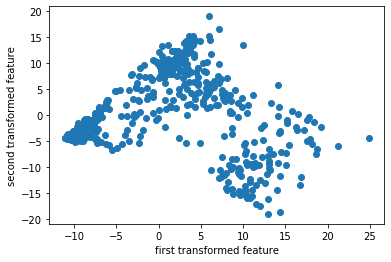

In [5]:
plt.scatter(X_std[:,0], X_std[:, 1])
plt.xlabel('first transformed feature')
plt.ylabel('second transformed feature')
plt.show()

Q. Try diﬀerent numbers of clusters (N), and state your assessment on a proper number of clusters

Sum of squared errors:  37677.309364374574


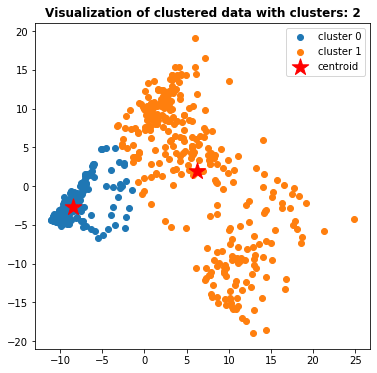

Sum of squared errors:  5253.218479170906


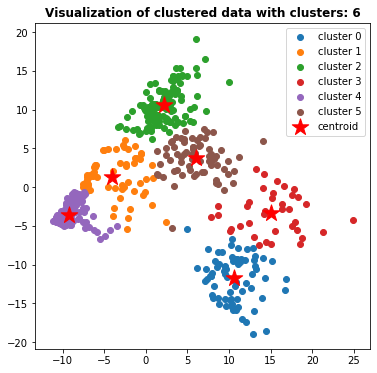

Sum of squared errors:  3176.7085835581056


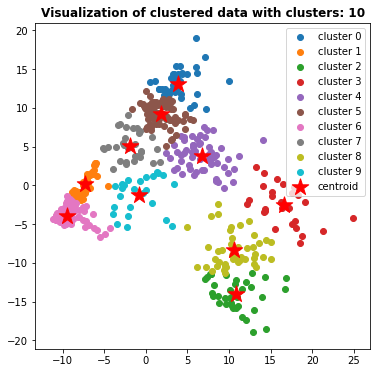

Sum of squared errors:  2312.697854596664


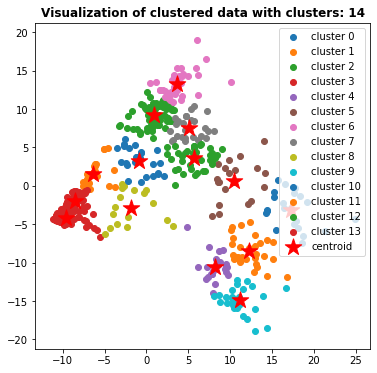

Sum of squared errors:  1693.6810043379041


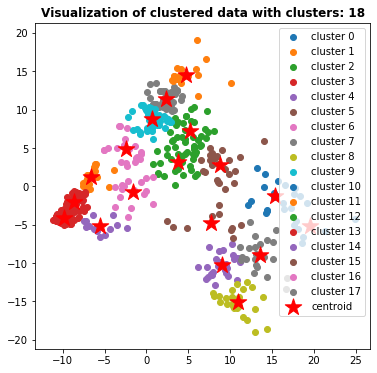

In [6]:
clusters = np.arange(2, 20, 4)
for cluster in clusters:
    km = KMeans(n_clusters=cluster,max_iter=100).fit(X_std)
    print('Sum of squared errors: ', km.inertia_)
    # Plot the clustered data
    fig, ax = plt.subplots(figsize=(6, 6))
    for i in range(cluster):
        plt.scatter(X_std[km.labels_ == i, 0], X_std[km.labels_ == i, 1],
                     label='cluster '+ str(i))
        #plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
        #            c='blue', label='cluster 2')
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=300,
                c='r', label='centroid')
    plt.legend()
    plt.title('Visualization of clustered data with clusters: ' + str(cluster), fontweight='bold')
    plt.show()
    ax.set_aspect('equal');

With visualizing above provided graphs, 6 clusters would be the most optimal clusters to seperate the data as data points are seperated and distinct better than other numbers of clusters

Q Taking the clusters obtained when N=2, check the degree of percentage overlap/consistency between the cluster memberships and the action labels originally provided. Comment on whether fall detection is possible based on these measurements.

# Cluster = 2

Percentage overlap:  81.2720848056537


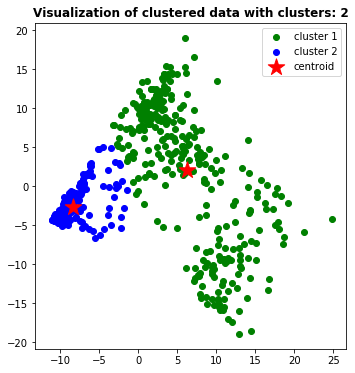

In [7]:
cluster = 2
km = KMeans(n_clusters=cluster,max_iter=100).fit(X_std)
# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.title('Visualization of clustered data with clusters: ' + str(cluster), fontweight='bold')
ax.set_aspect('equal');
print('Percentage overlap: ', percentage_overlap(km.labels_, Y))

Percentage Overlap is around 81% which is a good enough number. Clustering with PCA, indeed, is able to seperate Fall and Non-Fall instances quite well.

# Part B)

# SVM

In [23]:

df = pd.read_csv('./falldetection_dataset.csv', header=None)
df = df.iloc[:, 1:]
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values
Y = np.reshape(Y, (Y.shape[0], 1))
X_std = StandardScaler().fit_transform(X)

validation_perc = 0.15
test_perc = 0.15
train_perc = 0.70

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_perc, random_state=42, shuffle=True)
X_train, X_valid, y_train, y_valid =  train_test_split(X_train, y_train, test_size=.1765, random_state=42, shuffle=True)

clf = svm.SVC(C=1, kernel='poly', degree=2, gamma='auto').fit(X_train, y_train.flatten())
print('val score: ' + str(clf.score(X_valid, y_valid)))
print('test score: ' + str(clf.score(X_test, y_test)))        
        

val score: 1.0
test score: 1.0


For SVM, I tried different combinations of C and degree parameters in the function to find the best hyperparameters based on the validation test. It looks like, SVM can easily differentiate Fall and Not-Fall from wearable sensor data. I have used the original data, and not the PCA data, as it was giving more accuracy.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_std, Y.flatten(), test_size=test_perc, random_state=42, shuffle=True)
#X_train, X_valid, y_train, y_valid =  train_test_split(X_train, y_train, test_size=.1765, random_state=42, shuffle=True)
clf = MLPClassifier(hidden_layer_sizes=(2, 60), activation='relu', solver='adam', alpha=0.0001, learning_rate='adaptive',
                        shuffle=True,verbose=True, max_iter=1000, early_stopping=True, validation_fraction=0.1765)
clf.fit(X_train, y_train)
print('Test accuracy: ', clf.score(X_test, y_test.flatten()))

Iteration 1, loss = 0.69964799
Validation score: 0.529412
Iteration 2, loss = 0.68247458
Validation score: 0.576471
Iteration 3, loss = 0.66537543
Validation score: 0.600000
Iteration 4, loss = 0.64873579
Validation score: 0.658824
Iteration 5, loss = 0.63028634
Validation score: 0.682353
Iteration 6, loss = 0.61232815
Validation score: 0.752941
Iteration 7, loss = 0.59344105
Validation score: 0.776471
Iteration 8, loss = 0.57424585
Validation score: 0.823529
Iteration 9, loss = 0.55410898
Validation score: 0.870588
Iteration 10, loss = 0.53384788
Validation score: 0.894118
Iteration 11, loss = 0.51312822
Validation score: 0.894118
Iteration 12, loss = 0.49329822
Validation score: 0.894118
Iteration 13, loss = 0.47322894
Validation score: 0.894118
Iteration 14, loss = 0.45228587
Validation score: 0.905882
Iteration 15, loss = 0.43128198
Validation score: 0.929412
Iteration 16, loss = 0.41050883
Validation score: 0.929412
Iteration 17, loss = 0.38917257
Validation score: 0.929412
Iterat

For Neural network, I am using two hidden layers with 60 neurons each. My activation function is 'relu', solver is 'adam solver', L2 regulatization constant is 0.00001, learning_rate is adaptive which means it will keep changing while training, training is stop based on validation set score. If score doesnt improve much after a while, training will stop.
Neural Network is also able to learn from the dataset, fairly, well. Our test accuracy is around 94%, which is not so bad. However, SVM proved to be better than Neural Network, as far as classification accuracy is concerned. However, I cannot really make a comment on the performance on these models, because our dataset instances are too low. 